# Graphs comparaison

<hr style="clear:both">
This notebook creates graphs that show the diffence between performances of our two simulations (sequential or simultaneous).

**Authors:** [Lorenzo Ballinari](https://people.epfl.ch/lorenzo.ballinari), [Paulo Alexandre Ribeiro de Carvalho](https://people.epfl.ch/paulo.ribeirodecarvalho)

<hr style="clear:both">

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

%run regression.ipynb

######################################### ATTENTION ####################################################
#pour utiliser ce code, veuillez vous assurer d'avoir bien le fichier des données de "same_time" dans ce dossier code !

## Choose data to compare

In [2]:
objectif_function = 'detour time reduce' # can be : 'detour time', 'waiting time', 'maximize assignment, sharing' or 'maximize assignment, fleet'
total_requests = 7850 # normal : 31500 | reduce : 7850
base_fleet_size = 500 # normal : 2000 | reduce : 500

# display parameter
size = [8, 4] # size of graphs
quality = 100 # quality of graphs

# name of folder where plots will be save
name_folder = 'detour_time_reduce'

# polynomial regression
deg = 2

In [3]:
if objectif_function == 'detour time reduce':
    results_number = ['1_min_reduce','1_reduce','1_max_reduce','2_reduce','3_reduce', '4_reduce']
    x = [3,5,7,10,15,20]
    title_x = 'max. detour time [min]'

mean_waiting_times_separate = []
mean_detour_times_separate = []
percentage_sharings_separate = []
abandonments_separate = []
occupancies_0_separate = []
occupancies_1_separate = []
occupancies_2_separate = []

version = 'separate'
extension = ''

for number in results_number:
    Occupancy_perf = np.load(f"Results_{version}/condition_{number}/Occupancy_perf_condition_{number}{extension}.npy")
    Abandonment_perf = np.load(f"Results_{version}/condition_{number}/Abandonment_perf_condition_{number}{extension}.npy")
    Waiting_time_perf = np.load(f"Results_{version}/condition_{number}/Waiting_time_perf_condition_{number}{extension}.npy")
    Detour_time_perf = np.load(f"Results_{version}/condition_{number}/Detour_time_perf_condition_{number}{extension}.npy")

    mean_waiting_time = np.mean(Waiting_time_perf)
    mean_waiting_times_separate = np.append(mean_waiting_times_separate, mean_waiting_time*60)

    mean_detour_time = np.mean(Detour_time_perf)
    mean_detour_times_separate = np.append(mean_detour_times_separate, mean_detour_time*60)

    number_request_total = len(Waiting_time_perf)
    number_request_shared = len(Detour_time_perf)
    percentage_sharing = number_request_shared/number_request_total
    percentage_sharings_separate = np.append(percentage_sharings_separate, percentage_sharing*100)

    abandonment = Abandonment_perf[-1]
    abandonments_separate = np.append(abandonments_separate, (abandonment/total_requests)*100)

    occupancies_0_separate = np.append(occupancies_0_separate, (np.mean(Occupancy_perf[0,:])/base_fleet_size)*100)
    occupancies_1_separate = np.append(occupancies_1_separate, (np.mean(Occupancy_perf[1,:])/base_fleet_size)*100)    
    occupancies_2_separate = np.append(occupancies_2_separate, (np.mean(Occupancy_perf[2,:])/base_fleet_size)*100)
    
########################################### SECOND VALUES ################################################

mean_waiting_times_same_time = []
mean_detour_times_same_time = []
percentage_sharings_same_time = []
abandonments_same_time = []
occupancies_0_same_time = []
occupancies_1_same_time = []
occupancies_2_same_time = []

version = 'same_time'
extension = '_s_t'

for number in results_number:
    Occupancy_perf_same_time = np.load(f"Results_{version}/condition_{number}/Occupancy_perf_condition_{number}{extension}.npy")
    Abandonment_perf_same_time = np.load(f"Results_{version}/condition_{number}/Abandonment_perf_condition_{number}{extension}.npy")
    Waiting_time_perf_same_time = np.load(f"Results_{version}/condition_{number}/Waiting_time_perf_condition_{number}{extension}.npy")
    Detour_time_perf_same_time = np.load(f"Results_{version}/condition_{number}/Detour_time_perf_condition_{number}{extension}.npy")

    mean_waiting_time_same_time = np.mean(Waiting_time_perf_same_time)
    mean_waiting_times_same_time = np.append(mean_waiting_times_same_time, mean_waiting_time_same_time*60)

    mean_detour_time_same_time = np.mean(Detour_time_perf_same_time)
    mean_detour_times_same_time = np.append(mean_detour_times_same_time, mean_detour_time_same_time*60)

    number_request_total_same_time = len(Waiting_time_perf_same_time)
    number_request_shared_same_time = len(Detour_time_perf_same_time)
    percentage_sharing_same_time = number_request_shared_same_time/number_request_total_same_time
    percentage_sharings_same_time = np.append(percentage_sharings_same_time, percentage_sharing_same_time*100)

    abandonment_same_time = Abandonment_perf_same_time[-1]
    abandonments_same_time = np.append(abandonments_same_time, (abandonment_same_time/total_requests)*100)

    occupancies_0_same_time = np.append(occupancies_0_same_time, (np.mean(Occupancy_perf_same_time[0,:])/base_fleet_size)*100)
    occupancies_1_same_time = np.append(occupancies_1_same_time, (np.mean(Occupancy_perf_same_time[1,:])/base_fleet_size)*100)    
    occupancies_2_same_time = np.append(occupancies_2_same_time, (np.mean(Occupancy_perf_same_time[2,:])/base_fleet_size)*100)

# Graphs

### Waiting time

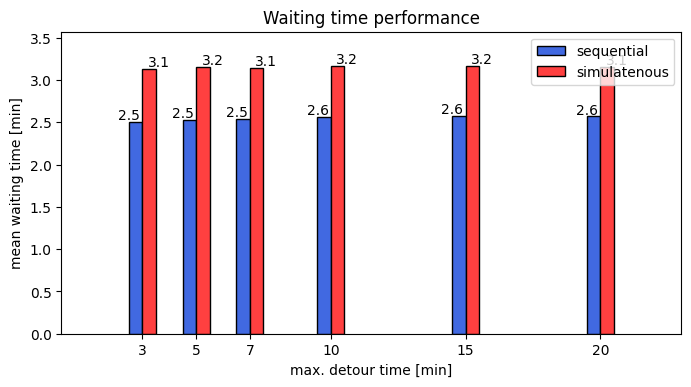

In [8]:
type_graph = 'waiting_time'

plt.figure(1, dpi=quality, figsize=size)

plt.bar([x-0.25 for x in x], mean_waiting_times_separate, width = 0.5, label='sequential',color='#4169E1',edgecolor='k')
plt.bar([x+0.25 for x in x], mean_waiting_times_same_time, width = 0.5, label='simulatenous',color='#FF4040',edgecolor='k')
plt.xticks(x)
plt.title('Waiting time performance')
plt.xlabel(title_x)
plt.ylabel('mean waiting time [min]')
plt.xlim(x[0]-3,x[-1]+3)
plt.ylim(0,max(mean_waiting_times_separate)+1)

for i in range(len(mean_waiting_times_separate)):
    plt.text(x[i]-0.9, mean_waiting_times_separate[i]+0.03, str(f'{mean_waiting_times_separate[i]:.1f}'))
    plt.text(x[i]+0.2, mean_waiting_times_same_time[i]+0.03, str(f'{mean_waiting_times_same_time[i]:.1f}'))

plt.legend(loc='upper right')
#plt.savefig(f'graphs_comparaison/{type_graph}')
plt.show()

## Detour time

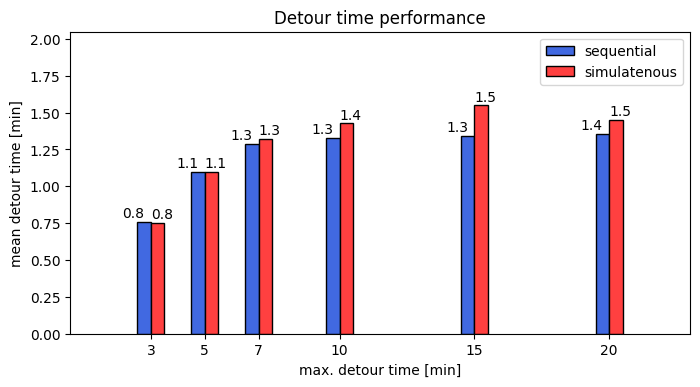

In [9]:
type_graph = 'detour_time'

plt.figure(1, dpi=quality, figsize=size)

plt.bar([x-0.25 for x in x], mean_detour_times_separate, width = 0.5, label='sequential',color='#4169E1',edgecolor='k')
plt.bar([x+0.25 for x in x], mean_detour_times_same_time, width = 0.5, label='simulatenous',color='#FF4040',edgecolor='k')
plt.xticks(x)
plt.title('Detour time performance')
plt.xlabel(title_x)
plt.ylabel('mean detour time [min]')
plt.xlim(x[0]-3,x[-1]+3)
plt.ylim(0,max(mean_detour_times_same_time)+0.5)

for i in range(len(mean_waiting_times_separate)):
    plt.text(x[i]-1.05, mean_detour_times_separate[i]+0.03, str(f'{mean_detour_times_separate[i]:.1f}'))
    plt.text(x[i]-0, mean_detour_times_same_time[i]+0.03, str(f'{mean_detour_times_same_time[i]:.1f}'))

plt.legend()
#plt.savefig(f'graphs_comparaison/{type_graph}')
plt.show()

## Sharing

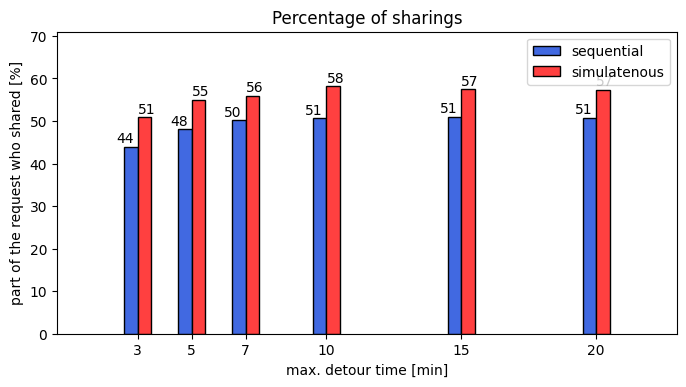

In [10]:
type_graph = 'sharing'

plt.figure(1, dpi=quality, figsize=size)

plt.bar([x-0.25 for x in x], percentage_sharings_separate, width = 0.5, label='sequential',color='#4169E1',edgecolor='k')
plt.bar([x+0.25 for x in x], percentage_sharings_same_time, width = 0.5, label='simulatenous',color='#FF4040',edgecolor='k')
plt.xticks(x)
plt.title('Percentage of sharings')
plt.xlabel(title_x)
plt.ylabel('part of the request who shared [%]')
plt.xlim(x[0]-3,x[-1]+3)
plt.ylim(0,max(percentage_sharings_separate)+20)

for i in range(len(percentage_sharings_separate)):
    plt.text(x[i]-0.8, percentage_sharings_separate[i]+1, str(f'{percentage_sharings_separate[i]:.0f}'))
    plt.text(x[i]-0, percentage_sharings_same_time[i]+1, str(f'{percentage_sharings_same_time[i]:.0f}'))

plt.legend()
#plt.savefig(f'graphs_comparaison/{type_graph}')
plt.show()

## Abandonments

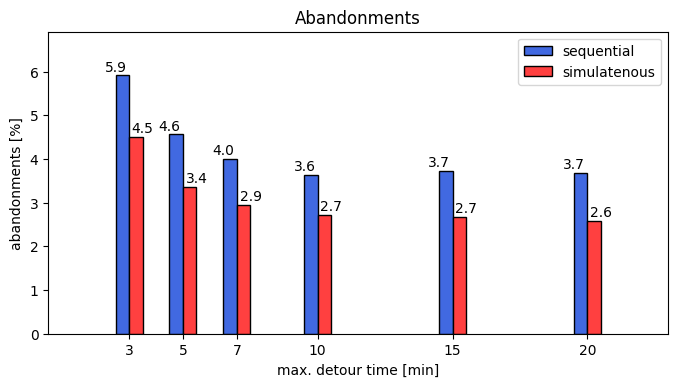

In [11]:
type_graph = 'abandonments'

plt.figure(1, dpi=quality, figsize=size)

plt.bar([x-0.25 for x in x], abandonments_separate, width = 0.5, label='sequential',color='#4169E1',edgecolor='k')
plt.bar([x+0.25 for x in x], abandonments_same_time, width = 0.5, label='simulatenous',color='#FF4040',edgecolor='k')
plt.xticks(x)
plt.title('Abandonments')
plt.xlabel(title_x)
plt.ylabel('abandonments [%]')
plt.xlim(x[0]-3,x[-1]+3)
plt.ylim(0,max(abandonments_separate)+1)

for i in range(len(abandonments_same_time)):
    plt.text(x[i]-0.9, abandonments_separate[i]+0.1, str(f'{abandonments_separate[i]:.1f}'))
    plt.text(x[i]+0.1, abandonments_same_time[i]+0.1, str(f'{abandonments_same_time[i]:.1f}'))

plt.legend()
#plt.savefig(f'graphs_comparaison/{type_graph}')
plt.show()